In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
import glob

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
from sklearn.manifold import TSNE

In [7]:
def plot_figure(m,j):
    fig, ax = plt.subplots( nrows=1, ncols=1 ) 
    a = np.loadtxt('../output_{}/latent_{}.csv'.format(m,j))
    s = pd.read_csv('../output_{}/survieinfo_{}.csv'.format(m,j))
    X_embedded = TSNE(n_components=2).fit_transform(a)
    idx_color = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    #ax.set_ylim()
    for i in range(10):
        to = s[s['clusters']==i].index
        y = X_embedded[to]
        ax.scatter(y[:,0], y[:,1], c=idx_color[i], alpha=.4)
    fig.savefig('../output/plots/{}.png'.format(j))   # save the figure to file
    plt.close(fig)
    return

In [90]:
def splot_figure(m,j):
    fig, ax = plt.subplots( nrows=2, ncols=1, figsize=(8,12) ) 
    a = np.loadtxt('/home/ccorbi/Work/Beagle/training/vae/METABRIC_n10/output_{}/latent_{}.csv'.format(m,j))
    s = pd.read_csv('/home/ccorbi/Work/Beagle/training/vae/METABRIC_n10/output_{}/survieinfo_{}.csv'.format(m,j))
    X_embedded = TSNE(n_components=2).fit_transform(a)
    idx_color = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'black', 'cyan']
    #ax.set_ylim()
    for i in range(10):
        to = s[s['clusters']==i].index
        y = X_embedded[to]
        ax[0].scatter(y[:,0], y[:,1], c=idx_color[i], alpha=.4, s=10)
    #fig.savefig('../output/plots/{}.png'.format(j))   # save the figure to file
    #plt.close(fig)
    return ax

In [91]:
from multiprocessing import Pool,TimeoutError


In [92]:
from lifelines import KaplanMeierFitter
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# kmf_control = KaplanMeierFitter()
# ax = kmf_control.fit(T_control, label='control').plot(ax=ax)

# kmf_exp = KaplanMeierFitter()
# ax = kmf_exp.fit(T_experiment, label='experiment').plot(ax=ax)

In [93]:
def getpvalue(fname, maxLineLength=280):
    fp=open(fname, "rb")
    fp.seek(-maxLineLength-1, 2) # 2 means "from the end of the file"
    return fp.readlines()[-1].strip() #.strip('[]')

def getbestepoch(fname, maxLineLength=280):
    fp=open(fname, "rb")
    fp.seek(-maxLineLength-1, 2) # 2 means "from the end of the file"
    return fp.readlines()[-2].split()[-1].strip().decode()

In [94]:
getbestepoch('/home/ccorbi/Work/Beagle/training/vae/METABRIC_n5/METABRIC0_CNV_IMPL_n10')

'1836'

In [95]:
getpvalue('/home/ccorbi/Work/Beagle/training/vae/METABRIC_n5/METABRIC0_CNV_IMPL_n10').decode().strip().strip('[]')

'5.90687943e-10'

In [106]:
def analisis(query):
    path = '/home/ccorbi/Work/Beagle/training/vae/METABRIC_n5/{}_n10'.format(query)
    epoch = getbestepoch(path)
    pval = getpvalue(path)
    ax = splot_figure(query, epoch)
    print(query, epoch, pval)
    data = pd.read_csv('/home/kimlab2/ccorbi/training/vae/METABRIC_n5/output_{}/survieinfo_{}.csv'.format(query, epoch))
    kmf_control = KaplanMeierFitter()
    #fig, ax = plt.subplots(1,1,figsize=(8,8))
    ax[1].set_title(query)
    for i in range(5):
        df = data[data['clusters']==i]
        ax[1] = kmf_control.fit(df['status'], label='{}'.format(i)).plot(ax=ax[1])

METABRIC1_CNV_IMPL 925 b'[3.3468414e-08]'


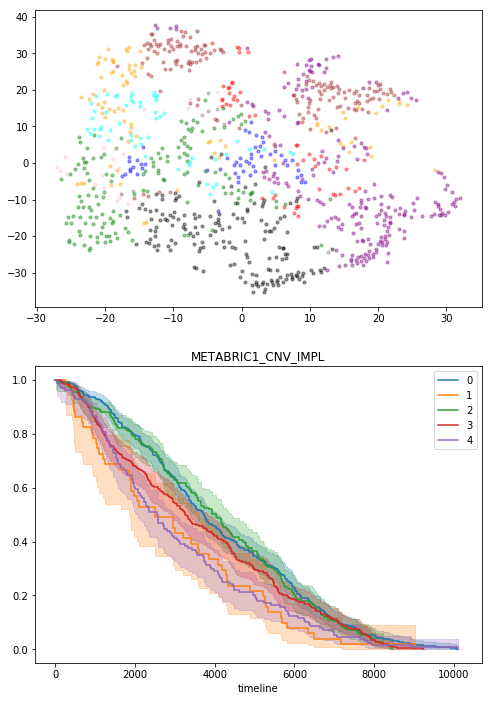

In [107]:
analisis('METABRIC1_CNV_IMPL')


METABRIC0_CNV_IMPL 1836 b'[5.90687943e-10]'


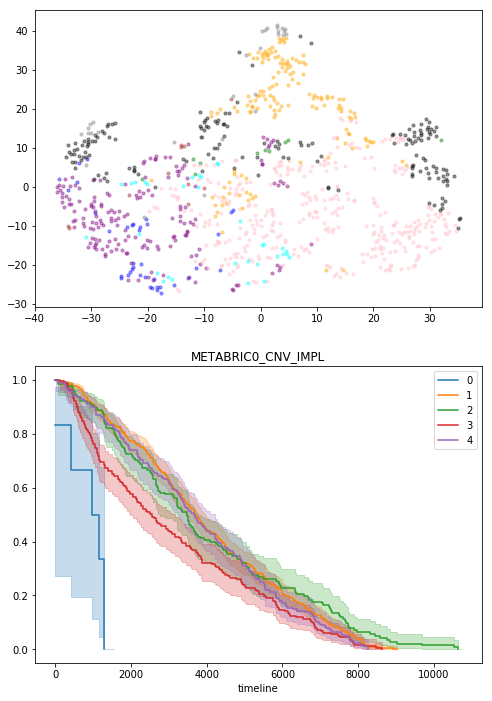

In [108]:
analisis('METABRIC0_CNV_IMPL')


METABRIC0_CNV_NOI 668 b'[1.66971592e-09]'


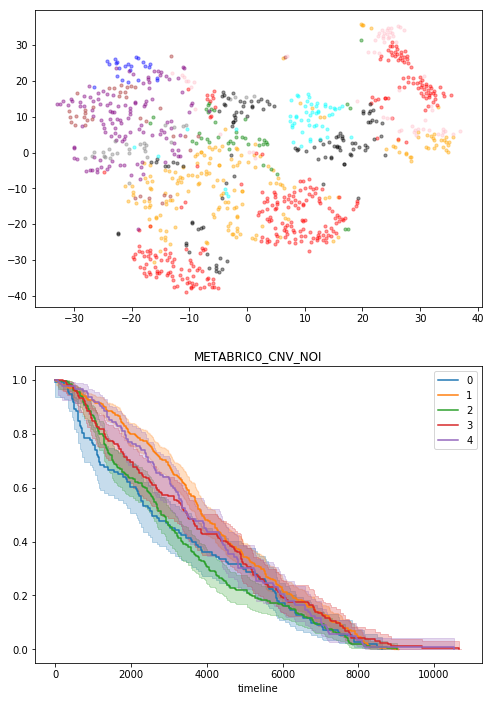

In [109]:
analisis('METABRIC0_CNV_NOI')

METABRIC1_CNV_NOI 2960 b'[9.56362551e-07]'


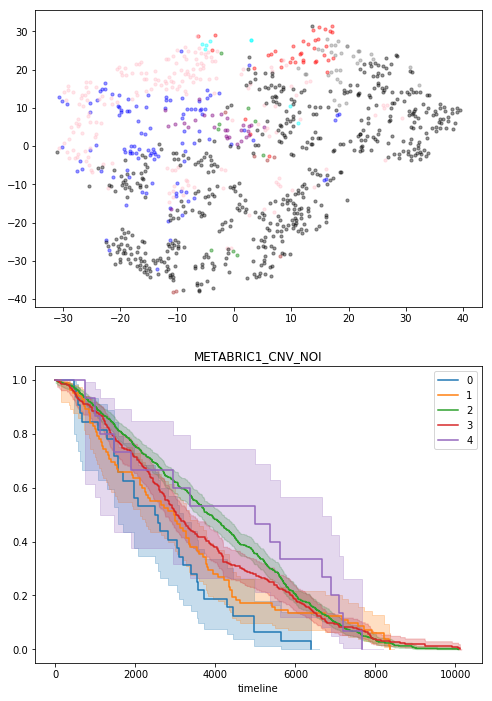

In [110]:
analisis('METABRIC1_CNV_NOI')

METABRIC0_miRNA_NOI 830 b'[7.9873051e-07]'


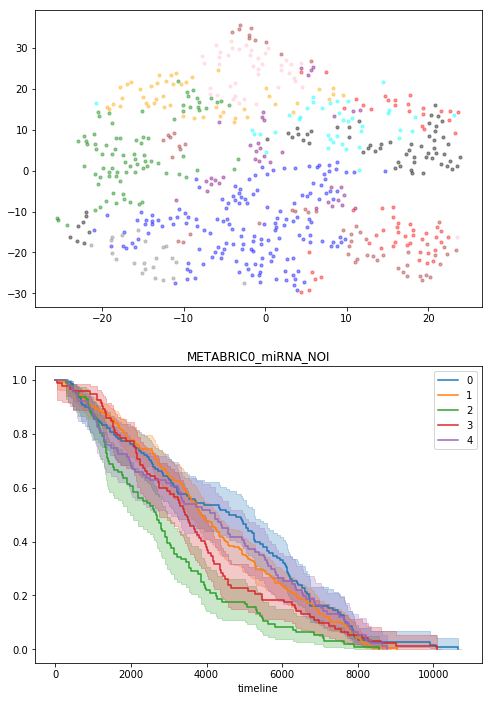

In [111]:
analisis('METABRIC0_miRNA_NOI')

METABRIC1_miRNA_NOI 3940 b'[1.80818693e-11]'


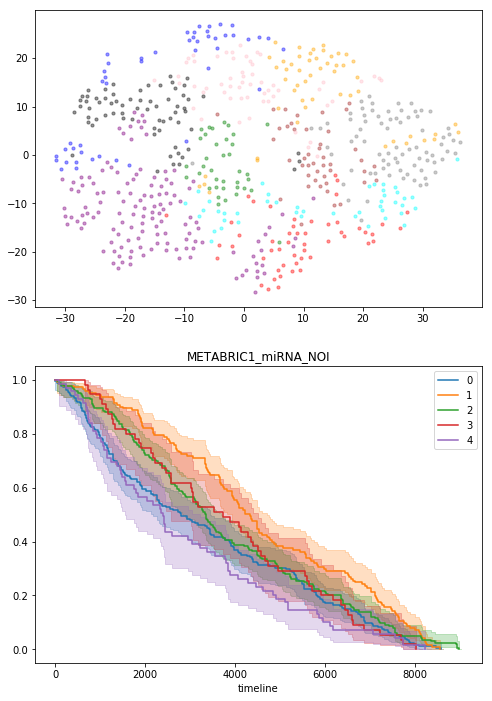

In [112]:
analisis('METABRIC1_miRNA_NOI')

METABRIC0_miRNA_IMPL 429 b'[3.76916751e-05]'


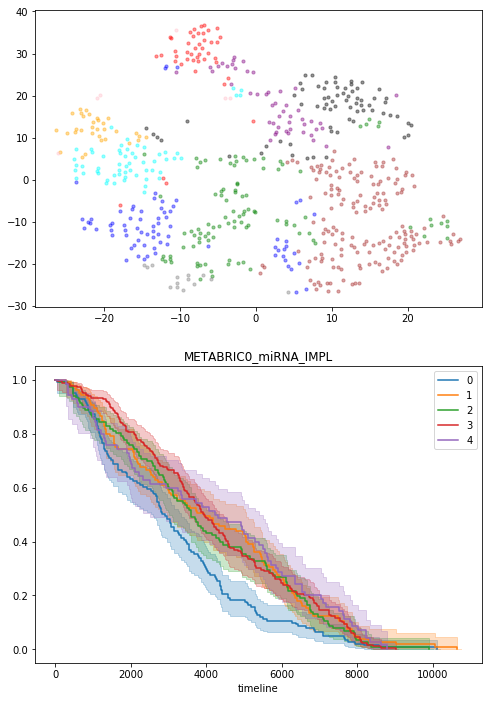

In [113]:
analisis('METABRIC0_miRNA_IMPL')

METABRIC1_miRNA_IMPL 17 b'[4.71087398e-08]'


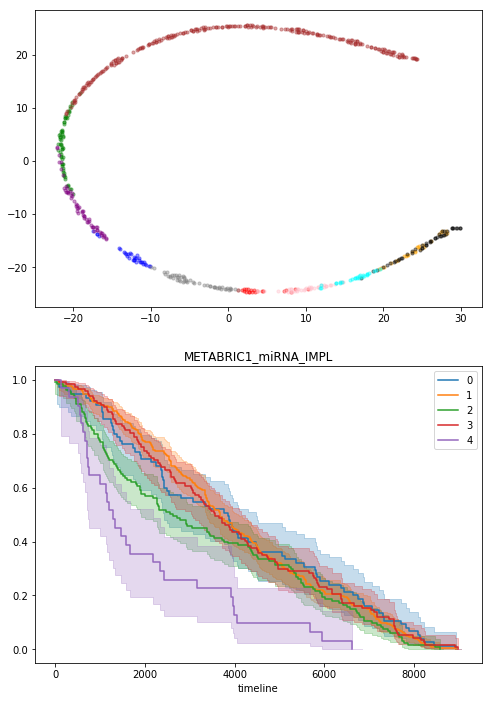

In [114]:
analisis('METABRIC1_miRNA_IMPL')